In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def file_open(filename1, filename2, filename3, filename4):
    AWI=pd.read_csv(filename1)
    CC=pd.read_csv(filename2)
    CFV=pd.read_csv(filename3)
    CSH=pd.read_csv(filename4)
    return(AWI,CC,CFV,CSH)

def AWI_dictCreate(AWI):
    AWI_dict={}
    for index, row in AWI.iterrows():
        AWI_dict[row['Year']]=float(row[' Amount '].strip(' ').replace(',',''))
    return(AWI_dict)

def CFV_dictCreate(CFV):
### Originally CFV_year_dictCreate()
    CFV_dict={}
    for i in CFV.itertuples():
        CFV_dict[i[1]]={}        
### Originally CFV_month_dictCreate()
    for i in CFV.itertuples():
        month=1
        for j in range(12):
            CFV_dict[i[1]][month]=i[j+2]
            month+=1
    return(CFV_dict)

def CSH_dictCreate(CSH):    
## Origingally CSH_year_dictCreate()
    CSH_dict={}
    for i in CSH.itertuples():
        CSH_dict[i[1]]={}        
### Originally CSH_month_dictCreate()
    for i in CSH.itertuples():
        month=1
        for j in range(12):
            CSH_dict[i[1]][month]=i[j+2]
            month+=1
    return(CSH_dict)

def CC_dictCreate(CC):
    year=1971
    CC_dict={}
    for index, row in CC.iterrows():
        if (str(row['Unnamed: 20'])).startswith('$'):
            CC_dict[year]=float(row['Unnamed: 20'].strip('$').replace(',',''))
            year+=1
        else:
            continue
    return(CC_dict) #error, return statement was print.
    
def phase1(filename1, filename2, filename3, filename4):
    AWI, CC, CFV, CSH = file_open(filename1, filename2, filename3, filename4)
    AWI_dict = AWI_dictCreate(AWI)
    CFV_dict = CFV_dictCreate(CFV)
    CSH_dict = CSH_dictCreate(CSH)
    CC_dict = CC_dictCreate(CC)
    return AWI_dict, CFV_dict, CSH_dict, CC_dict

#input two lists or tuples and return a list of nested tuples
def lists2tuples(L1,L2):
    
    tupL = tuple()
    temptup = tuple()
    L = list()

    for i in range(len(L1)):
        temptup2 = (L1[i],L2[i])
        L.append(temptup2)
    
    L = tuple(L)
    
    return L

# input a list or tuple and calculate the average increase as a float
def avg_inc(T):
    try:
        L  = list()
        prev = T[0][1]
    
        for i in range(len(T)):
            inc = T[i][1]-prev
            L.append(inc)
            prev = T[i][1]
        
        L.remove(L[0])
        # return the average of the resulting list
        return round(sum(L)/len(L),2)
    except:
        print('Error: avg_inc() failed to execute properly. Check that incoming list or tuple ' + 
              'is of the format T = ((year1,value1),(year2,value2)... etc)')
        return None
    
# takes the raw dictionaries with all possible years and removes years before 1973 and after 2014
def crop_data(D):
    CD = dict()
    for k,v in D.items():
        if k >= 1973 and k<= 2014:
            CD[k]=D[k]
        else:
            None
    return CD
    
# final output to be used in visual representations
def finished_calcs_dict():
    calcs_dict = {
'wage':{'ann_avg' : 100.1, 'p_inc' : 1.2, 'avg_inc' : 100.5, 'L_trend' : ((1,0), (4,4), (7,8))}, 
'veg':{'ann_avg' : 200.2, 'p_inc' : 2.3, 'avg_inc' : 200.6, 'L_trend' : ((4,0), (7,4), (10,8))},
'cattle':{'ann_avg' : 300.3, 'p_inc' : 3.4, 'avg_inc' : 300.7, 'L_trend' : ((7,0), (10,4), (13,8))}, 
'college':{'ann_avg' : 400.4, 'p_inc' : 4.5 , 'avg_inc' : 400.8, 'L_trend' : ((10,0), (13,4), (16,8))}}
    return calcs_dict

#print out the contents of the final dictionary
def print_results(D):
    for k,v in D.items():
        print(k,':')
        print('anual average from 1973 to 2014 =',"$"+str(D[k]['ann_avg']))
        print('% increase from 1973 to 2014 =',"%"+str(D[k]['p_inc']))
        print('anual average increase from 1973 to 2014 =',"$"+str(D[k]['avg_inc']))
        print('the linear trend is =',D[k]['L_trend'])
        print("")
    return None

def graph_list(xytuple,dot,label):
    x = xytuple[0]
    y = xytuple[1]
    y = scale(y) #scales list
    line1 = plt.plot(x,y,dot,label=label)
    plt.legend()
    return None
    
def graph_linear_regression(mbtuple,start,finish,line_type,label):
    #given slope, y-intercept, and an interval this will make a linear regression.
    m = mbtuple[0]
    b = mbtuple[1]
    x = np.linspace(start,finish+1,100)
    line1 = plt.plot(x,m*x+b,line_type,label=label) 
    plt.legend()
    return None
    
def scale(t):
    #changes a list so all values are in decimal approximations of percent baseline
    scale_factor = (len(t) / sum(t))
    for i in range(len(t)):
        t[i] = t[i]*scale_factor
    return t

def dict_to_list(d):
    #turns dictionary into list, keeping order of items. 
    t = []
    for item in d:
        t.append(d[item])
    return t

def range_of_time(d,start,end):
    #takes a dictionary whose entries are keyed to a interval of integers and returns a tuple 
    #containing a list of values and a list of keys. Start and end are inclusive. Essentially cropped data as above.
    #Has an off by one error when dealing with months.
    t = []
    dates = []
    for i in range(start,end+1):
        if isinstance(d[i],(int,float)):
            t.append(d[i])
            dates.append(i)
        elif isinstance(d[i],dict):
            for month in range(len(d[i])):
                t.append(d[i][month + 1])
                dates.append(i + ((month)/12))
        else:
            print('unexpected type')
    return(dates, t)

def calculate_linear_trend(xytuple):
    #calculates linear trend given x and y
    x = xytuple[0]
    y = xytuple[1]
    if not (len(x) == len(y)):
        return None
    else:
        xysum = 0
        xsqrsum = 0
        for index in range(len(x)):
            xysum += x[index]*y[index]
            xsqrsum += x[index]**2
        m = ((len(x)*xysum)-(sum(x)*sum(y))) / (len(x)*xsqrsum - (sum(x)**2))
        b = (sum(y)*xsqrsum - sum(x)*xysum)/(len(x)*xsqrsum - (sum(x)**2))
        return(m, b)
def set_graph():
    plt.rcParams["figure.figsize"] = [16,9]
    plt.xlabel('Years')
    plt.ylabel('*Scaled to Average')


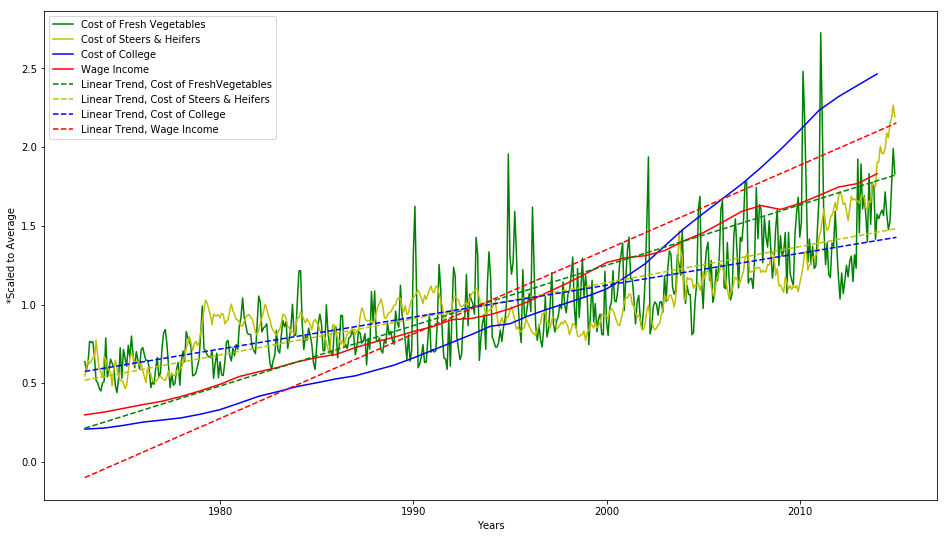

In [146]:
set_graph()
stats = phase1('Average_Wage_Index_1973-2017.csv','College_1971-2018.csv','Fresh_vegetables_1947-2015.csv','Slaughter_steers_and_heifers_1947-2015.csv')
s1 = range_of_time(stats[0],1973,2014)
s2 = range_of_time(stats[1],1973,2014)
s3 = range_of_time(stats[2],1973,2014)
s4 = range_of_time(stats[3],1973,2014)
graph_list(s2,'g-','Cost of Fresh Vegetables')
graph_list(s3,'y-','Cost of Steers & Heifers')
graph_list(s4,'b-','Cost of College')
graph_list(s1,'r-','Wage Income')
mb1 = (calculate_linear_trend(s1))
mb2 = (calculate_linear_trend(s2))
mb3 = (calculate_linear_trend(s3))
mb4 = (calculate_linear_trend(s4))
graph_linear_regression(mb1,1973,2014,'g--',"Linear Trend, Cost of FreshVegetables")
graph_linear_regression(mb2,1973,2014,'y--',"Linear Trend, Cost of Steers & Heifers")
graph_linear_regression(mb3,1973,2014,'b--',"Linear Trend, Cost of College")
graph_linear_regression(mb4,1973,2014,'r--',"Linear Trend, Wage Income")

In [7]:
AWI = 'Average_Wage_Index_1973-2017.csv'
CFV = 'College_1971-2018.csv'
CC = 'College_1971-2018.csv'
CSH = 'Slaughter_steers_and_heifers_1947-2015.csv'

In [10]:
import phase1

all_years = phase1.phase1(AWI,CC,CFV,CSH)

AWI_data = AWI_dictCreate(pd.read_csv(AWI))
CFV_data = CFV_dictCreate(pd.read_csv(CFV))
CC_data = CC_dictCreate(pd.read_csv(CC))
CSH_data = CSH_dictCreate(pd.read_csv(CSH))

{1971: 1410.0, 1972: 1550.0, 1973: 1600.0, 1974: 1650.0, 1975: 1780.0, 1976: 1940.0, 1977: 2040.0, 1978: 2150.0, 1979: 2330.0, 1980: 2550.0, 1981: 2870.0, 1982: 3200.0, 1983: 3430.0, 1984: 3680.0, 1985: 3860.0, 1986: 4050.0, 1987: 4200.0, 1988: 4460.0, 1989: 4720.0, 1990: 5070.0, 1991: 5450.0, 1992: 5830.0, 1993: 6210.0, 1994: 6620.0, 1995: 6740.0, 1996: 7140.0, 1997: 7470.0, 1998: 7770.0, 1999: 8080.0, 2000: 8440.0, 2001: 9030.0, 2002: 9670.0, 2003: 10530.0, 2004: 11380.0, 2005: 12120.0, 2006: 12840.0, 2007: 13560.0, 2008: 14370.0, 2009: 15240.0, 2010: 16180.0, 2011: 17160.0, 2012: 17820.0, 2013: 18380.0, 2014: 18930.0, 2015: 19570.0, 2016: 20150.0, 2017: 20790.0, 2018: 21370.0}


In [16]:
T=(AWI_data,CFV_data,CC_data,CSH_data)

for i in T:
    for k,v in i.items():
        print(k)
    print('')


1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017

Academic Year
71-72
72-73
73-74
74-75
75-76
76-77
77-78
78-79
79-80
80-81
81-82
82-83
83-84
84-85
85-86
86-87
87-88
88-89
89-90
90-91
91-92
92-93
93-94
94-95
95-96
96-97
97-98
98-99
99-00
00-01
01-02
02-03
03-04
04-05
05-06
06-07
07-08
08-09
09-10
10-11
11-12
12-13
13-14
14-15
15-16
16-17
17-18
18-19
NOTE: Average tuition and fee prices reflect in-district charges for public two-year institutions and in-state charges for public four-year institutions.
SOURCES: College Board, Annual Survey of Colleges; NCES, Digest of Education Statistics; NCES, IPEDS Fall Enrollment data.
This table was prepared in October 2018.
nan

1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000

In [ ]:

## not working yet
AWI_Cropped = crop_data(AWI_data)
CFV_Cropped = crop_data(CFV_data)
CC_Cropped  = crop_data(CC_data)
CSH_Cropped  = crop_data(CSH_data)

print('AWI=',AWI_data)
print('CFV=',CFV_data)
print('CC=',CC_data)
print('CSH=',CSH_data)